<a href="https://colab.research.google.com/github/Fer03Liz/Fer03Liz/blob/main/ModeloPromediosMoviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab para pronosticos y replicas con promedios moviles
##Buscando un n aceptable entre 1-5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ks_1samp, shapiro, norm, mode

from google.colab import drive

# Paso 1: Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Paso 2: Definir la ruta del archivo Excel en Google Drive, recuerda tener el excel de datos en tu drive
#ruta_archivo = '/content/drive/MyDrive/carpeta_del_archivo/datos.xlsx'  # Se debe cambiar "carpeta_del_archivo" y "datos.xlsx" (el archivo debe tener al menos 10 demandas)
#Para este caso usaremos esta ruta:
ruta_archivo = '/content/drive/MyDrive/Monitoria_Maestria/Demandas.xlsx'

In [3]:
# Paso 3: Leer el archivo Excel
try:
    df = pd.read_excel(ruta_archivo)

    # Mostrar los datos cargados
    print("Datos cargados exitosamente:")
    print(df)

except Exception as e:
    print(f"Error al cargar los datos: {e}")

Datos cargados exitosamente:
    Periodo  Demanda
0         1       14
1         2       25
2         3       27
3         4       35
4         5       14
5         6       45
6         7       43
7         8       44
8         9       38
9        10       30
10       11       26
11       12       17
12       13       24
13       14       42
14       15       23


In [4]:
#Paso 4: Convertir columnas a tipos numéricos si es necesario

df["Periodo"] = pd.to_numeric(df["Periodo"], errors="coerce")
df["Demanda"] = pd.to_numeric(df["Demanda"], errors="coerce")
periodos = df["Periodo"]
demandas = df["Demanda"]


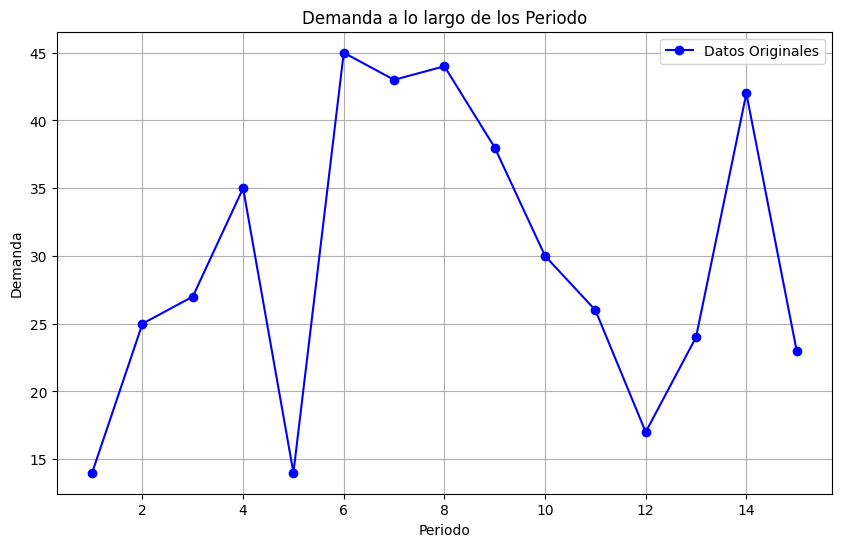

In [5]:
# Paso 5: Graficar los datos originales

plt.figure(figsize=(10, 6))
plt.plot(df["Periodo"], df["Demanda"], marker='o', label="Datos Originales", color="blue")
plt.title("Demanda a lo largo de los Periodo")
plt.xlabel("Periodo")
plt.ylabel("Demanda")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
MADS =[]
MSES =[]
MAPES=[]
u=5     # Cantidad de datos a comparar y pronosticar

In [7]:
def pronosticar_promedio_movil(n, demandas, u, imprimir=False):
    total_periodos = len(demandas)
    inicio = total_periodos - u - n

    # Validación crítica
    if inicio < 0:
        raise ValueError(f"Error: n={n} es demasiado grande para u={u} y {total_periodos} datos. Máximo n permitido: {total_periodos - u}")

    # Resto del código
    predicciones = []
    demandas_reales = []
    errores = []

    MAD = 0
    MSE = 0
    MAPE = 0

    for i in range(u):
        suma = sum(demandas[inicio + i + j] for j in range(n))
        pronostico = suma / n
        real = demandas[inicio + i + n]
        error = real - pronostico

        # Acumular métricas
        MAD += abs(error)
        MSE += error**2
        MAPE += abs(error) / real

        # Almacenar valores
        predicciones.append(pronostico)
        demandas_reales.append(real)
        errores.append(error)

    # Calcular promedios
    MAD /= u
    MSE /= u
    MAPE = (MAPE / u) * 100

    if imprimir:
        print(f"\n--- Resultados para n = {n} ---")
        print("Demandas reales:", demandas_reales)
        print("Pronósticos:    ", [round(x, 2) for x in predicciones])
        print("Errores:        ", [round(x, 2) for x in errores])
        print(f"MAD:  {MAD:.2f}")
        print(f"MSE:  {MSE:.2f}")
        print(f"MAPE: {MAPE:.2f}%")

    return MAD, MSE, MAPE, errores, predicciones

In [8]:
MADS       = []
MSES       = []
MAPES      = []
errores    = []
predicciones = []
for n in range(1, u + 1):
    try:
        MAD, MSE, MAPE, error, prediccion = pronosticar_promedio_movil(n, demandas, u, imprimir=True)
        MADS.append(MAD)
        MSES.append(MSE)
        MAPES.append(MAPE)
        errores.append(error)
        predicciones.append(prediccion)
    except ValueError as e:
        print(f"Saltando n={n}: {str(e)}")


--- Resultados para n = 1 ---
Demandas reales: [26, 17, 24, 42, 23]
Pronósticos:     [30.0, 26.0, 17.0, 24.0, 42.0]
Errores:         [-4.0, -9.0, 7.0, 18.0, -19.0]
MAD:  11.40
MSE:  166.20
MAPE: 44.59%

--- Resultados para n = 2 ---
Demandas reales: [26, 17, 24, 42, 23]
Pronósticos:     [34.0, 28.0, 21.5, 20.5, 33.0]
Errores:         [-8.0, -11.0, 2.5, 21.5, -10.0]
MAD:  10.60
MSE:  150.70
MAPE: 40.11%

--- Resultados para n = 3 ---
Demandas reales: [26, 17, 24, 42, 23]
Pronósticos:     [37.33, 31.33, 24.33, 22.33, 27.67]
Errores:         [-11.33, -14.33, -0.33, 19.67, -4.67]
MAD:  10.07
MSE:  148.51
MAPE: 39.28%

--- Resultados para n = 4 ---
Demandas reales: [26, 17, 24, 42, 23]
Pronósticos:     [38.75, 34.5, 27.75, 24.25, 27.25]
Errores:         [-12.75, -17.5, -3.75, 17.75, -4.25]
MAD:  11.20
MSE:  163.20
MAPE: 45.67%

--- Resultados para n = 5 ---
Demandas reales: [26, 17, 24, 42, 23]
Pronósticos:     [40.0, 36.2, 31.0, 27.0, 27.8]
Errores:         [-14.0, -19.2, -7.0, 15.0, -4.8

In [9]:
#Paso 7 encontrar cual fue el mejor n, aqui primero se prioriza que sea el mejor con todas las metricas, sino se toma el de mejor MAPE
mejorn=0
mejorMape=0
mejorMad=0
mejorMse=0
minMape=9999
minMad =9999
minMse =9999

for i in range(u):
  if(MAPES[i]<minMape):
    minMape=MAPES[i]
    mejorMape=i+1
  if(MADS[i]<minMad):
    minMad=MADS[i]
    mejorMad=i+1
  if(MSES[i]<minMse):
    minMse=MSES[i]
    mejorMse=i+1

print("El mejor n por su mape es: ",mejorMape)
print("El mejor n por su mad es: ",mejorMad)
print("El mejor n por su mse es: ",mejorMse)

mejorN=0
if(mejorMape==mejorMad and mejorMape==mejorMse):
  print("El mejor n es: ",mejorMape)
  mejorn=mejorMape
else:
    print("El mejor n es: ",mejorMape)
    mejorn=mejorMape

El mejor n por su mape es:  3
El mejor n por su mad es:  3
El mejor n por su mse es:  3
El mejor n es:  3


In [10]:
erroresF= errores[mejorn-1]
prediccionesF= predicciones[mejorn-1]

print("Pronosticos del periodo ", mejorn, " :")
for i, pronostico in enumerate(prediccionesF, 1):
    print(f"  Pronóstico del periodo {i}: {pronostico:.2f}")
print("\n")
print("Errores del periodo ", mejorn, " :")
for i, error in enumerate(erroresF, 1):
    print(f"  Error del periodo {i}: {error:.2f}")

Pronosticos del periodo  3  :
  Pronóstico del periodo 1: 37.33
  Pronóstico del periodo 2: 31.33
  Pronóstico del periodo 3: 24.33
  Pronóstico del periodo 4: 22.33
  Pronóstico del periodo 5: 27.67


Errores del periodo  3  :
  Error del periodo 1: -11.33
  Error del periodo 2: -14.33
  Error del periodo 3: -0.33
  Error del periodo 4: 19.67
  Error del periodo 5: -4.67


### Replicas

In [11]:
def calcular_estadisticas(data):
    """
    Calcula el promedio y la desviación estándar de una lista de números.

    Parámetros:
        data (list): Lista de valores numéricos.

    Retorna:
        tuple: (promedio, desviacion_estandar)
    """
    promedio = np.mean(data)
    desviacion_estandar = np.std(data)
    return promedio, desviacion_estandar

In [12]:
normalidad=0
promedio, desviacion_errores = calcular_estadisticas(erroresF)
if (u <=30):# Usar prueba de Shapiro-Wilk para tamaños de muestra pequeños
        estadistico, p_valor = shapiro(erroresF)
        prueba = "Shapiro-Wilk"
else:
        # Usar prueba de Kolmogorov-Smirnov para tamaños grandes
        estadistico, p_valor = ks_1samp(erroresF, norm.cdf, args=(promedio, desviacion_errores))
        prueba = "Kolmogorov-Smirnov"

if p_valor > 0.05:
        print(f"Los errores de entrenamiento tienen una distribución normal según {prueba} (p-valor = {p_valor:.4f}).")
        normalidad=1
else:
        print(f"Los errores de entrenamiento NO tienen una distribución normal según {prueba} (p-valor = {p_valor:.4f}).")
        normalidad=0

Los errores de entrenamiento tienen una distribución normal según Shapiro-Wilk (p-valor = 0.3458).


In [13]:
# Generar error_simulado según el resultado de normalidad
error_simulado = np.random.normal(promedio, desviacion_errores) if normalidad else np.random.choice(erroresF, replace=True)
print(error_simulado)

11.252777781392869


In [41]:
def pronosticar_promedio_movil_replicas(n, demandas, u, erroresF, normalidad, imprimir=False):
    """
    Genera pronósticos con ruido simulado en los datos históricos.

    Parámetros:
        n (int): Ventana del promedio móvil
        demandas (list): Datos históricos reales
        u (int): Número de pronósticos a generar
        erroresF (list): Errores históricos para simulación
        normalidad (bool): Si los errores siguen distribución normal
        imprimir (bool): Mostrar detalles del cálculo

    Retorna:
        tuple: (MAD, MSE, MAPE, errores, predicciones, errores_simulados)
    """
    total_periodos = len(demandas)
    inicio = total_periodos - u - n

    # Validar parámetros
    if inicio < 0:
        raise ValueError(f"n={n} es demasiado grande para u={u} con {total_periodos} datos")

    # Calcular parámetros de error
    promedio = np.mean(erroresF)
    desviacion = np.std(erroresF)

    predicciones = []
    demandas_reales = []
    errores = []
    errores_simulados = []  # Lista para almacenar los ruidos aplicados

    MAD = MSE = MAPE = 0

    for i in range(u):
        suma_con_ruido = 0
        ruidos_ventana = []  # Almacena los ruidos de esta ventana

        for j in range(n):
            # Generar y almacenar ruido
            if normalidad:
                ruido = np.random.normal(promedio, desviacion)
            else:
                ruido = np.random.choice(erroresF)

            ruidos_ventana.append(ruido)
            suma_con_ruido += abs(demandas[inicio + i + j] + ruido)

        # Calcular pronóstico y almacenar ruidos
        pronostico = suma_con_ruido / n
        errores_simulados.append(ruidos_ventana)

        # Resto del cálculo
        real = demandas[inicio + i + n]
        error = real - pronostico

        MAD += abs(error)
        MSE += error**2
        MAPE += abs(error)/real

        predicciones.append(pronostico)
        demandas_reales.append(real)
        errores.append(error)

    # Cálculos finales
    MAD /= u
    MSE /= u
    MAPE = (MAPE / u) * 100


    if imprimir:
        print(f"\n--- Pronósticos con n={n} y ruido {'normal' if normalidad else 'no-normal'} ---")

        # Mostrar detalles por periodo
        for idx, ruidos in enumerate(errores_simulados):
            print(f"\nPeriodo {idx + 1}:")
            print(f"Datos originales: {demandas[inicio + idx : inicio + idx + n].tolist()}")
            print(f"Ruidos aplicados: {[round(r, 2) for r in ruidos]}")
            print(f"Datos con ruido:  {[round(d + r, 2) for d, r in zip(demandas[inicio + idx : inicio + idx + n].tolist(), ruidos)]}")
            print(f"Pronóstico generado: {round(predicciones[idx], 2)}")
            print(f"Valor real: {demandas_reales[idx]}")
            print(f"Error resultante: {round(errores[idx], 2)}")

        # Resumen final mejorado
        print("\nRESUMEN FINAL:")
        print("-" * 40)
        print("{:<10} {:<15} {:<15} {:<15}".format(
            "Periodo", "Pronóstico", "Real", "Error"))
        print("-" * 40)
        for idx in range(u):
            print("{:<10} {:<15.2f} {:<15} {:<15.2f}".format(
                idx + 1,
                predicciones[idx],
                demandas_reales[idx],
                errores[idx]
            ))
        print("-" * 40)
        print(f"MAD: {MAD:.2f} | MSE: {MSE:.2f} | MAPE: {MAPE:.2f}%")

    return MAD, MSE, MAPE, errores, predicciones, errores_simulados

In [42]:
#Una sola iteración:
mad, mse, mape, erroresi1, predicciones1, errores_simuladosi1=pronosticar_promedio_movil_replicas(mejorn, demandas, u, erroresF, normalidad, True)


--- Pronósticos con n=3 y ruido normal ---

Periodo 1:
Datos originales: [44, 38, 30]
Ruidos aplicados: [-2.86, -18.28, -1.69]
Datos con ruido:  [41.14, 19.72, 28.31]
Pronóstico generado: 29.72
Valor real: 26
Error resultante: -3.72

Periodo 2:
Datos originales: [38, 30, 26]
Ruidos aplicados: [-9.04, 4.16, -0.01]
Datos con ruido:  [28.96, 34.16, 25.99]
Pronóstico generado: 29.7
Valor real: 17
Error resultante: -12.7

Periodo 3:
Datos originales: [30, 26, 17]
Ruidos aplicados: [-2.88, 3.69, 3.28]
Datos con ruido:  [27.12, 29.69, 20.28]
Pronóstico generado: 25.69
Valor real: 24
Error resultante: -1.69

Periodo 4:
Datos originales: [26, 17, 24]
Ruidos aplicados: [-5.97, -3.85, -9.03]
Datos con ruido:  [20.03, 13.15, 14.97]
Pronóstico generado: 16.05
Valor real: 42
Error resultante: 25.95

Periodo 5:
Datos originales: [17, 24, 42]
Ruidos aplicados: [12.88, 5.61, -3.12]
Datos con ruido:  [29.88, 29.61, 38.88]
Pronóstico generado: 32.79
Valor real: 23
Error resultante: -9.79

RESUMEN FINAL:

In [45]:
#Varias iteraciones: para este caso 500
MADS       = []
MSES       = []
MAPES      = []
MAD_promedio=0
MSE_promedio=0
MAPE_promedio=0
num_simulaciones = 500 # Cuantas iteaciones desees
for _ in range(num_simulaciones):
    try:
        mad, mse, mape, error, prediccion, errores_simulado = pronosticar_promedio_movil_replicas (mejorn, demandas, u, erroresF, normalidad, True)
        MADS.append(mad)
        MSES.append(mse)
        MAPES.append(mape)
    except ValueError as e:
        print(f"Saltando n={n}: {str(e)}")

MAD_promedio = np.mean(MADS)
MSE_promedio = np.mean(MSES)
MAPE_promedio = np.mean(MAPES)

print("RESULTADOS")
print(f"MAD: {MAD_promedio:.2f}")
print(f"MSE: {MSE_promedio:.2f}")
print(f"MAPE: {MAPE_promedio:.2f}%")

Se han truncado las últimas 5000 líneas del flujo de salida.

Periodo 4:
Datos originales: [26, 17, 24]
Ruidos aplicados: [-1.89, 9.05, 2.34]
Datos con ruido:  [24.11, 26.05, 26.34]
Pronóstico generado: 25.5
Valor real: 42
Error resultante: 16.5

Periodo 5:
Datos originales: [17, 24, 42]
Ruidos aplicados: [0.2, -11.09, 14.48]
Datos con ruido:  [17.2, 12.91, 56.48]
Pronóstico generado: 28.86
Valor real: 23
Error resultante: -5.86

RESUMEN FINAL:
----------------------------------------
Periodo    Pronóstico      Real            Error          
----------------------------------------
1          34.26           26              -8.26          
2          37.96           17              -20.96         
3          21.23           24              2.77           
4          25.50           42              16.50          
5          28.86           23              -5.86          
----------------------------------------
MAD: 10.87 | MSE: 164.38 | MAPE: 46.28%

--- Pronósticos con n=3 y ruido n